In [103]:
% matplotlib inline
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats

In [2]:
data = pd.read_csv("/Users/rongrongzhang/Dropbox/AIM/IntroToPythonTensorflow/datasets/housing/housing.csv",
                   sep=',', header=0)

In [79]:
data.sample(frac=0.0001, replace = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20012,-119.08,36.02,26.0,1748.0,346.0,891.0,303.0,1.9439,62100.0,INLAND
16922,-122.33,37.58,27.0,5144.0,1481.0,2518.0,1447.0,3.4836,287900.0,NEAR OCEAN


In [9]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
subset = data[data.ocean_proximity.isin(['NEAR BAY', 'NEAR OCEAN'])]

In [18]:
subset = subset.dropna().copy()

In [34]:
group1 = subset[subset.ocean_proximity=='NEAR BAY']['median_income']
group2 = subset[subset.ocean_proximity=='NEAR OCEAN']['median_income']
stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=2.9267298330234186, pvalue=0.0034412254718068354)

In [26]:
import math
#sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(alpha = 0.95,                        # Confidence level
                 df = group1.size-1,                     # Degrees of freedom
                 loc = group1.mean(), # Sample mean
                 scale= group1.std()/math.sqrt(group1.size) )   

(4.0924592205669414, 4.258834612032197)

In [29]:
scipy.stats.ks_2samp(group1,group2)             # test from the same distribution or not

Ks_2sampResult(statistic=0.052810800662469265, pvalue=0.0021364511514543566)

In [30]:
#scipy.stats.wilcoxon(x, y)                  # non-parametric version of matched-pair t test

In [31]:
stats.t.ppf(q = 0.025,  # Quantile to check
            df = 49)  # Degrees of freedom

-2.0095752344892093

In [32]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*


0.013121066545690117

In [35]:
group1.describe()

count    2270.000000
mean        4.175647
std         2.021120
min         0.499900
25%         2.835750
50%         3.818650
75%         5.059200
max        15.000100
Name: median_income, dtype: float64

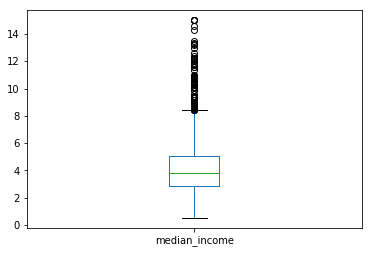

In [43]:
group1.plot(kind = "box")

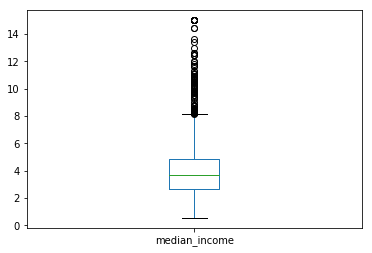

In [44]:
group2.plot(kind = "box")

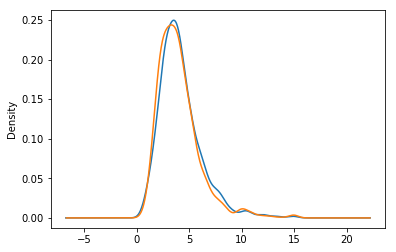

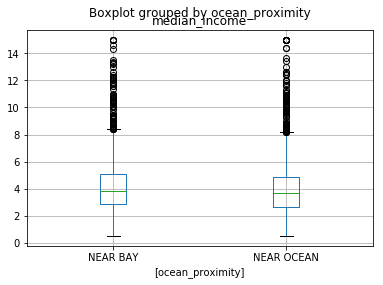

In [73]:
import matplotlib.pyplot as plt


subset.groupby('ocean_proximity').median_income.plot(kind="kde")

subset[['ocean_proximity', "median_income"]].boxplot(by='ocean_proximity')


In [102]:
data.groupby(by = 'ocean_proximity', as_index=False).agg({'median_income': [np.mean, np.std, np.size]})

ocean_proximity median_income                  
                           mean       std    size
0       <1H OCEAN      4.230682  2.001223  9136.0
1          INLAND      3.208996  1.437465  6551.0
2          ISLAND      2.744420  0.444180     5.0
3        NEAR BAY      4.172885  2.017427  2290.0
4      NEAR OCEAN      4.005785  2.010558  2658.0

In [91]:
?data.groupby

In [105]:
pd.concat([data, pd.get_dummies(data.ocean_proximity)], axis = 1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
